In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
******* The New York Stock index vs Nasdaq index *******

In [2]:
## Reading csv files
def read_file(filename):
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        if line.find("Volume") != -1:
            continue
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
#       time1 = int(line_split[0])
        current = float(line_split[-2])
#       concat = [time1,current]
        data_array.append(current)
    return data_array

In [3]:
## New York Stock Adj Close index 
NYA_data = read_file("^NYA.csv")
## Nasdaq Stock Adj Close index
IXIC_data = read_file("^IXIC.csv")

In [4]:
NYA_data[0:2]

[641.719971, 638.02002]

In [5]:
IXIC_data[0:2]

[148.169998, 145.970001]

In [6]:
X = [] # New York Stock close index
y = [] # Nasdaq Stock close index
for kk in range(0,len(NYA_data)):
    X.append(NYA_data[kk])
    y.append(IXIC_data[kk])

In [7]:
print(X)

[641.719971, 638.02002, 646.799988, 649.22998, 661.809998, 663.179993, 668.789978, 669.630005, 672.280029, 676.190002, 676.190002, 674.599976, 676.080017, 682.109985, 678.090027, 688.669983, 690.679993, 690.150024, 697.440002, 692.469971, 699.349976, 693.73999, 698.710022, 694.590027, 696.070007, 701.98999, 705.159973, 714.469971, 709.599976, 713.830017, 716.580017, 706.539978, 699.349976, 693.849976, 704.320007, 698.179993, 695.75, 685.070007, 688.77002, 679.890015, 679.570007, 686.76001, 680.419983, 680.530029, 670.159973, 654.940002, 644.570007, 640.659973, 648.48999, 643.52002, 636.539978, 635.159973, 615.599976, 624.799988, 627.130005, 620.26001, 615.809998, 597.099976, 594.669983, 591.919983, 584.72998, 600.799988, 609.580017, 611.47998, 615.390015, 612.75, 600.909973, 606.719971, 617.609985, 624.380005, 623.849976, 617.719971, 616.450012, 610.210022, 607.460022, 604.919983, 599.849976, 621.099976, 623.320007, 627.869995, 631.570007, 634.530029, 636.219971, 638.22998, 633.789978,

In [8]:
print(y)

[148.169998, 145.970001, 148.020004, 148.619995, 150.679993, 151.600006, 153.119995, 153.869995, 154.399994, 154.960007, 155.990005, 155.809998, 156.139999, 157.350006, 156.919998, 158.5, 159.240005, 159.699997, 160.699997, 160.289993, 161.300003, 161.75, 162.300003, 162.020004, 162.199997, 162.990005, 163.770004, 165.25, 164.460007, 164.570007, 164.979996, 163.539993, 162.559998, 161.059998, 162.100006, 161.309998, 160.080002, 157.970001, 158.5, 157.729996, 157.460007, 158.029999, 156.869995, 155.389999, 152.940002, 148.639999, 146.190002, 143.75, 144.559998, 144.630005, 144.979996, 144.440002, 139.699997, 138.919998, 139.970001, 139.639999, 138.800003, 134.610001, 132.520004, 132.220001, 124.089996, 129.25, 131.0, 133.139999, 135.800003, 136.009995, 133.399994, 134.369995, 136.039993, 137.279999, 137.75, 136.669998, 136.389999, 135.759995, 134.550003, 134.660004, 133.080002, 135.710007, 136.919998, 138.690002, 137.919998, 138.539993, 139.350006, 139.990005, 139.679993, 140.25, 141.03

In [9]:
# Polynomial fit using Numpy
Order = 2
fit = np.polyfit(X,y,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t")
print(fit1)
y1 = fit1(X)

Coeff  [3.71685924e-05 2.56639672e-02 2.82521318e+02]
           2
3.717e-05 t + 0.02566 t + 282.5


In [10]:
# Equation
# I(t) = 3.717e-05xt**2 - 2.566e-02xt + 282.5 

In [11]:
# Using polynomial equation, find the value of Nasdaq Stock index for time interval of 10 days
y_calculated = []
for val in range(642,12380,10):
    y_calculated.append(fit1(val))  

In [12]:
# print to check
print(y_calculated[0:5])
print(len(y_calculated))
print(len(X))

[314.31714116249873, 315.0547424205196, 315.7997773970208, 316.5522460920025, 317.3121485054647]
1174
9815


In [13]:
nums = []
for kk in range(642,12380,10):
    nums.append(kk)

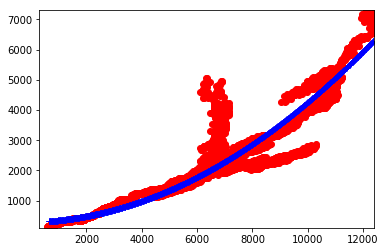

In [14]:
plt.plot(X,y,'ro')
plt.plot(nums,y_calculated,'b+')
plt.axis([300,12400,100,7300])
plt.show()

In [15]:
# OK, now predict Nasdaq index for New York Stock index at 150000 and 160000
print(fit1(150000))
print(fit1(160000))

840425.4454532414
955904.7215724278


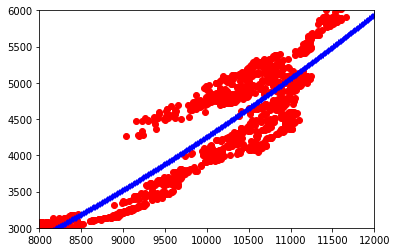

In [16]:
# Zoom in to see details
plt.plot(X,y,'ro')
plt.plot(nums,y_calculated,'b+')
plt.axis([8000,12000,3000,6000])
plt.show()